In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('diabetes.csv')

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
# Features
x = data.drop('Outcome', axis=1)

In [19]:
# data['Outcome'] is a pd Series. np.ravel turns it into an array (with no index column)
y = np.ravel(data['Outcome'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=50)

In [21]:
# Normalise the data (think normal distribution)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
# DEFINE
from sklearn.svm import SVC
svc_model = SVC()

In [23]:
svc_model.fit(x_train, y_train)

SVC()

In [24]:
y_predict = svc_model.predict(x_test)

In [25]:
# Create confusion matrix comparing predicted values to actual values
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Diabetic', 'Not Diabetic'], columns=['Predicted Diabetes', 'Predicted Healthy'])

In [26]:
confusion

,Predicted Diabetes,Predicted Healthy
Diabetic,225,23
Not Diabetic,68,68


<AxesSubplot:>

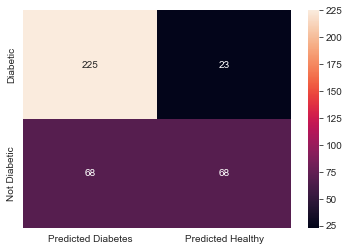

In [27]:

sns.heatmap(confusion,annot=True,fmt='g')

In [28]:
# prints report to show accuracy of model by comparing test values to predicted values. Shows this model had a 77% success rate
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.77      0.91      0.83       248\n           1       0.75      0.50      0.60       136\n\n    accuracy                           0.76       384\n   macro avg       0.76      0.70      0.72       384\nweighted avg       0.76      0.76      0.75       384\n'